<h1><center> Exploratory Data Analysis for Taxi Trip Duration

# Table of Contents
### -  [Step 0: Imports and Reading Data](#step0)
### -  [Step 1: Data Understanding](#step1)
### -  [Step 2: Data Preparation](#step2)
### -  [Step 3: Feature Understanding](#step3)
### -  [Step 4: Feature Relationships](#step4)
### -  [Step 5: Conclusion and Insights](#step5)

# Step 0: Imports and Reading Data <a id="step0"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('train.csv')
df=df.head(100000)

# Step 1: Data Understanding <a id="step1"></a>

In [3]:
df.shape

(100000, 10)

In [4]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [5]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [6]:
df.nunique()

id                    100000
vendor_id                  2
pickup_datetime        99608
passenger_count            7
pickup_longitude       12728
pickup_latitude        25894
dropoff_longitude      15684
dropoff_latitude       30246
store_and_fwd_flag         2
trip_duration           4127
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  100000 non-null  object 
 1   vendor_id           100000 non-null  int64  
 2   pickup_datetime     100000 non-null  object 
 3   passenger_count     100000 non-null  int64  
 4   pickup_longitude    100000 non-null  float64
 5   pickup_latitude     100000 non-null  float64
 6   dropoff_longitude   100000 non-null  float64
 7   dropoff_latitude    100000 non-null  float64
 8   store_and_fwd_flag  100000 non-null  object 
 9   trip_duration       100000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 7.6+ MB


In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.536300,1.668540,-73.973384,40.750817,-73.973464,40.751675,971.345080
std,0.498683,1.317039,0.041252,0.034423,0.043186,0.038512,3395.006506
min,1.000000,0.000000,-77.896019,35.310307,-79.817978,35.173546,2.000000
25%,1.000000,1.000000,-73.991943,40.737311,-73.991364,40.735774,395.000000
50%,2.000000,1.000000,-73.981750,40.754019,-73.979736,40.754452,661.000000
75%,2.000000,2.000000,-73.967255,40.768429,-73.962997,40.769837,1078.000000
max,2.000000,6.000000,-72.074333,41.033432,-72.022408,41.201595,86366.000000


# Step 2: Data Preperation <a id="step2"></a>

#### Checking for Duplicates

In [9]:
df.duplicated().sum()

0

#### checking for missing

In [10]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### Detect outliers using Interquartile Range (IQR)

In [11]:

Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df['trip_duration'] < (Q1 - 1.5 * IQR)) | (df['trip_duration'] > (Q3 + 1.5 * IQR)))]


### Featue extraction


extracting Time features

In [12]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['day_of_year']=df['pickup_datetime'].dt.dayofyear
df['day_of_month'] = df['pickup_datetime'].dt.day

### Feature creation

1-The great-circle distance

In [13]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Radius of Earth in kilometers
    R = 6371.0
    
    # Calculate the distance
    distance = R * c
    
    return distance
df['distance']=haversine(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])


2-Speed (km/h)

In [14]:
df['Speed']=df['distance']/(df['trip_duration']/60*60*60)

3-Time of Day

In [15]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time_of_day)


4-Season

In [16]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)


# Step 3: Feature Understanding <a id="step3"></a>

#### numerical features

In [17]:
numerical_features=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude','trip_duration', 'distance','Speed']

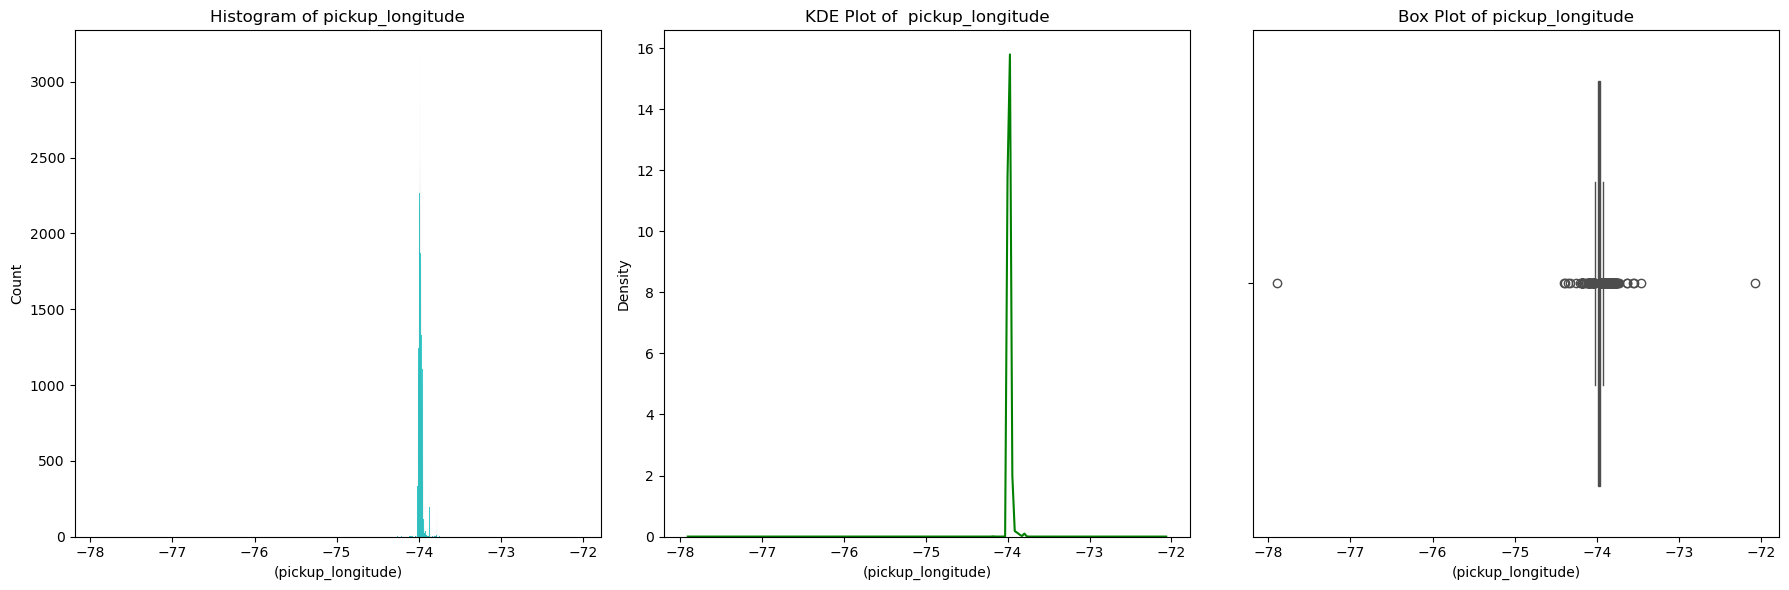

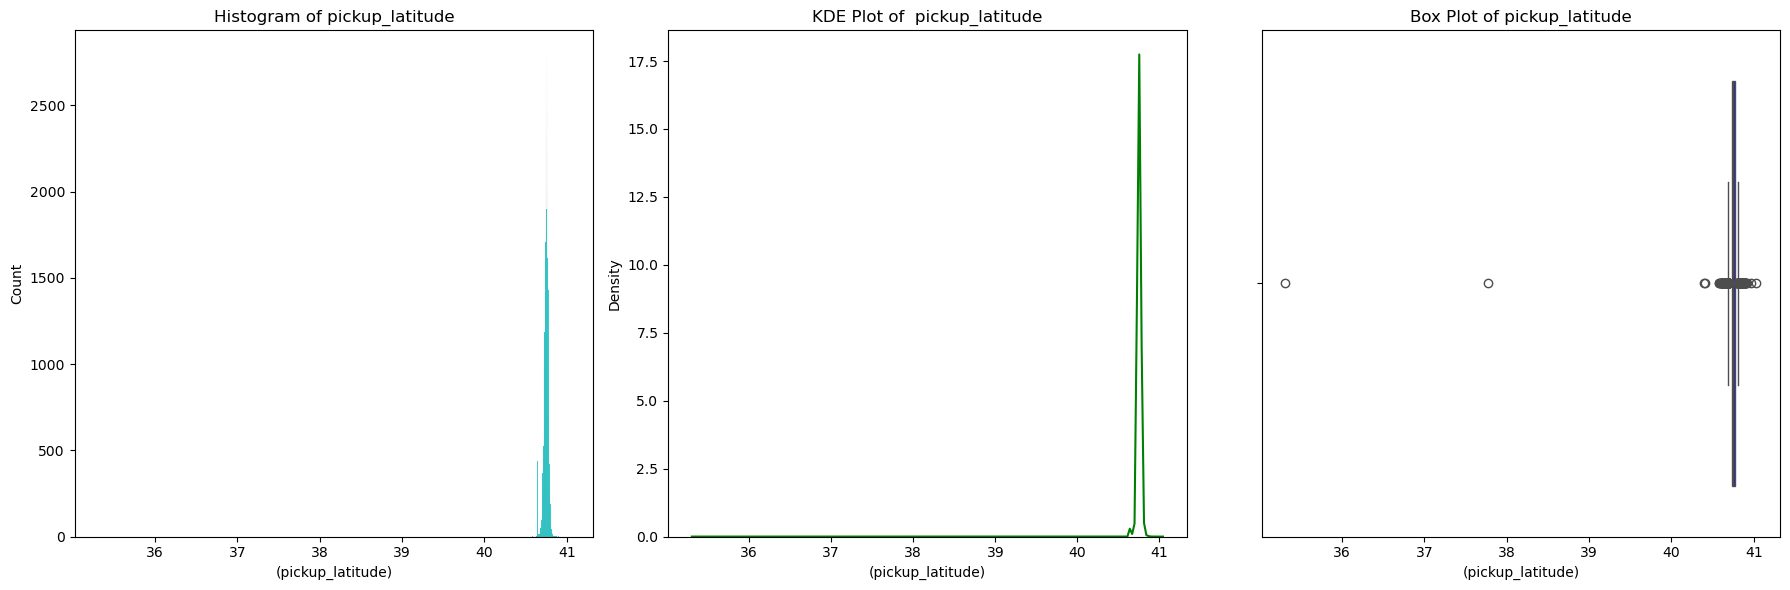

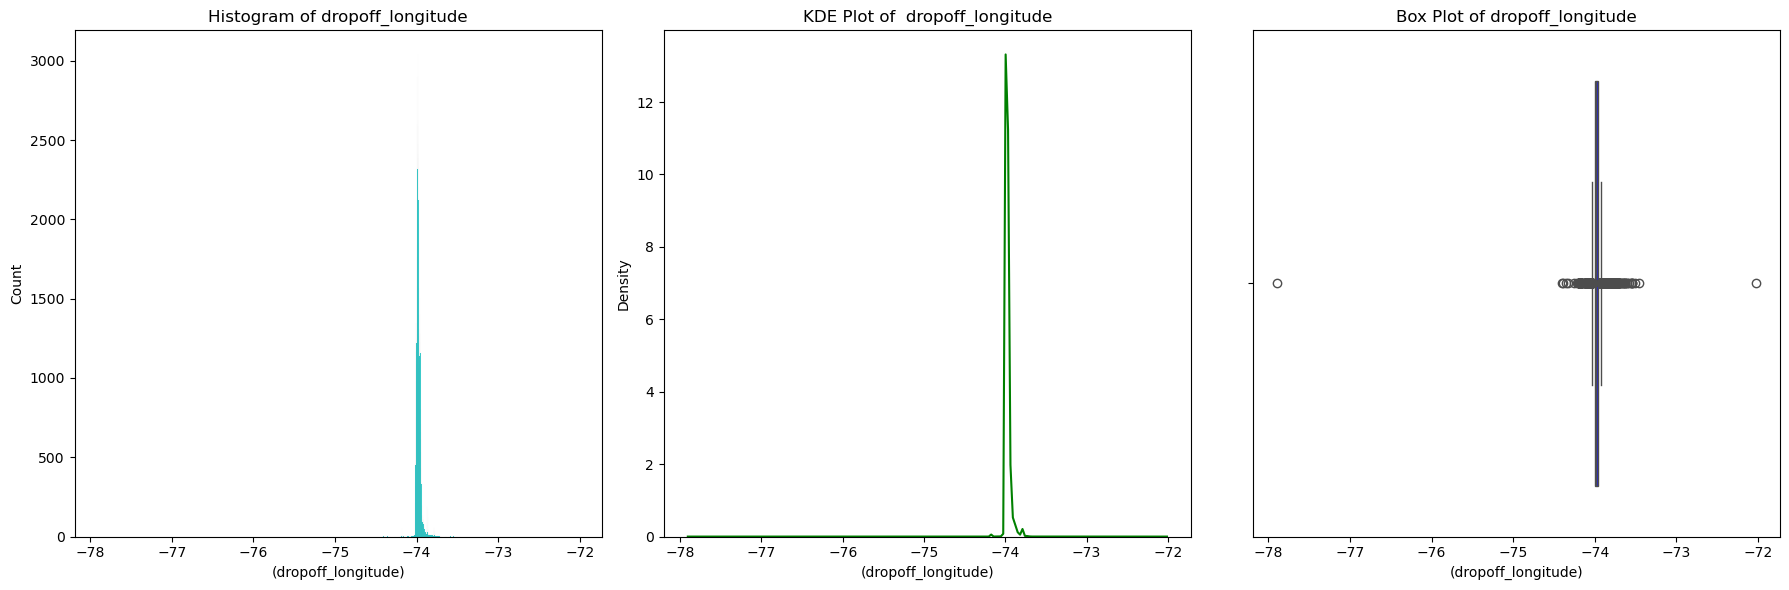

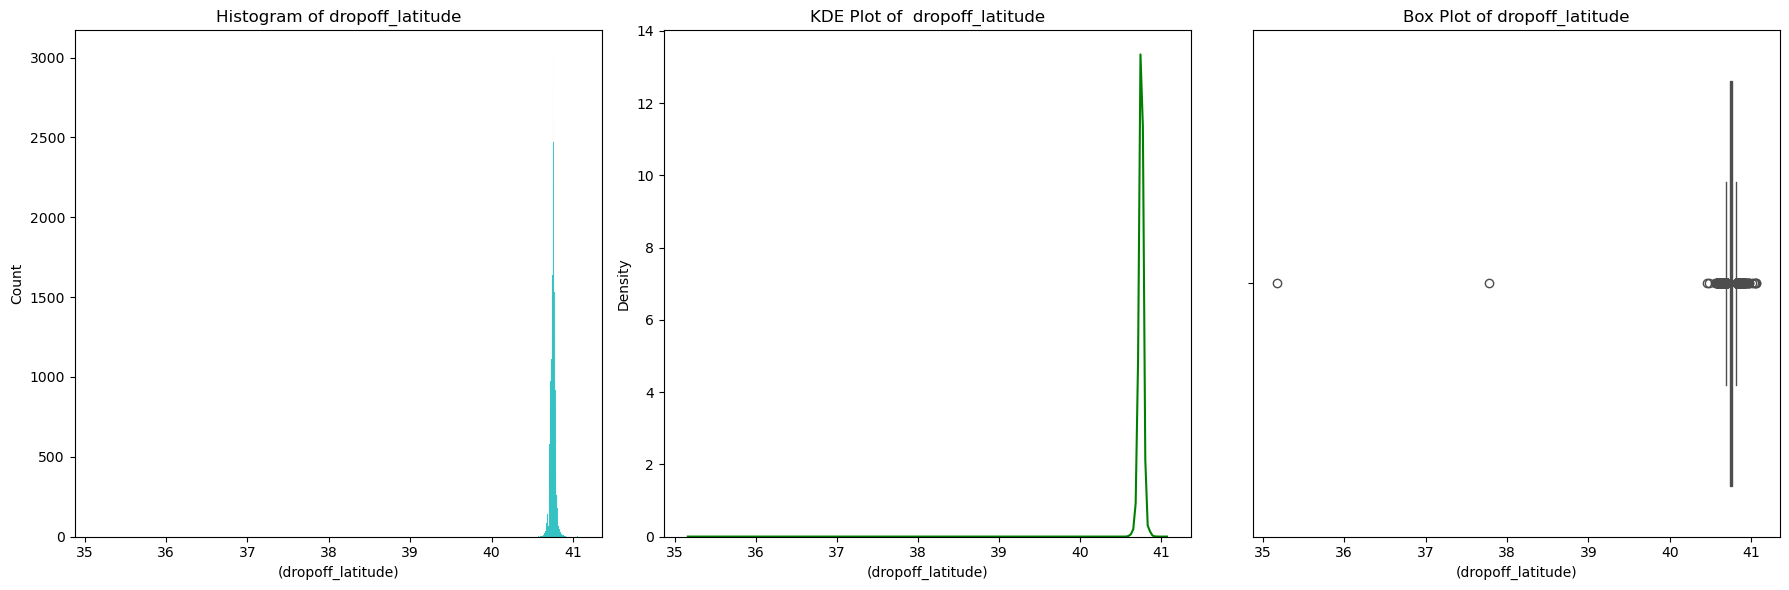

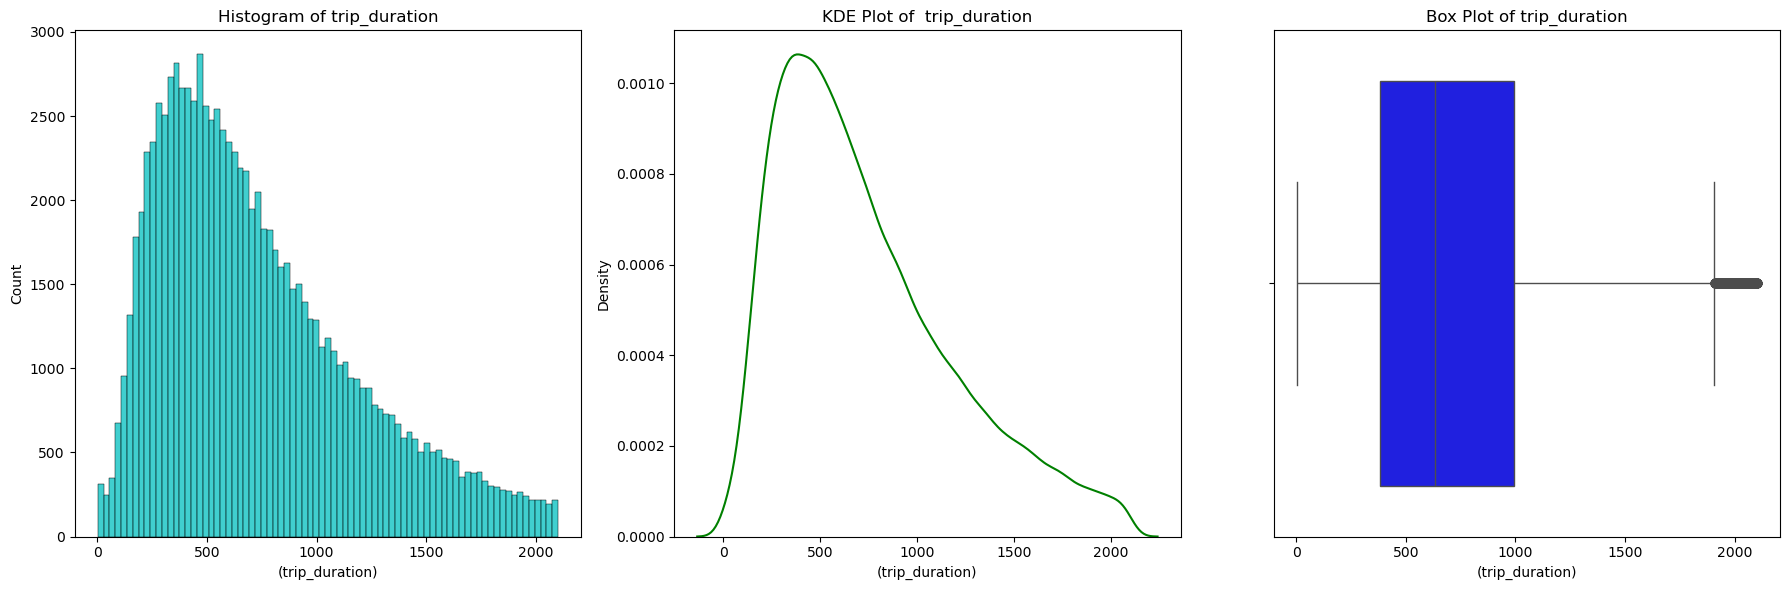

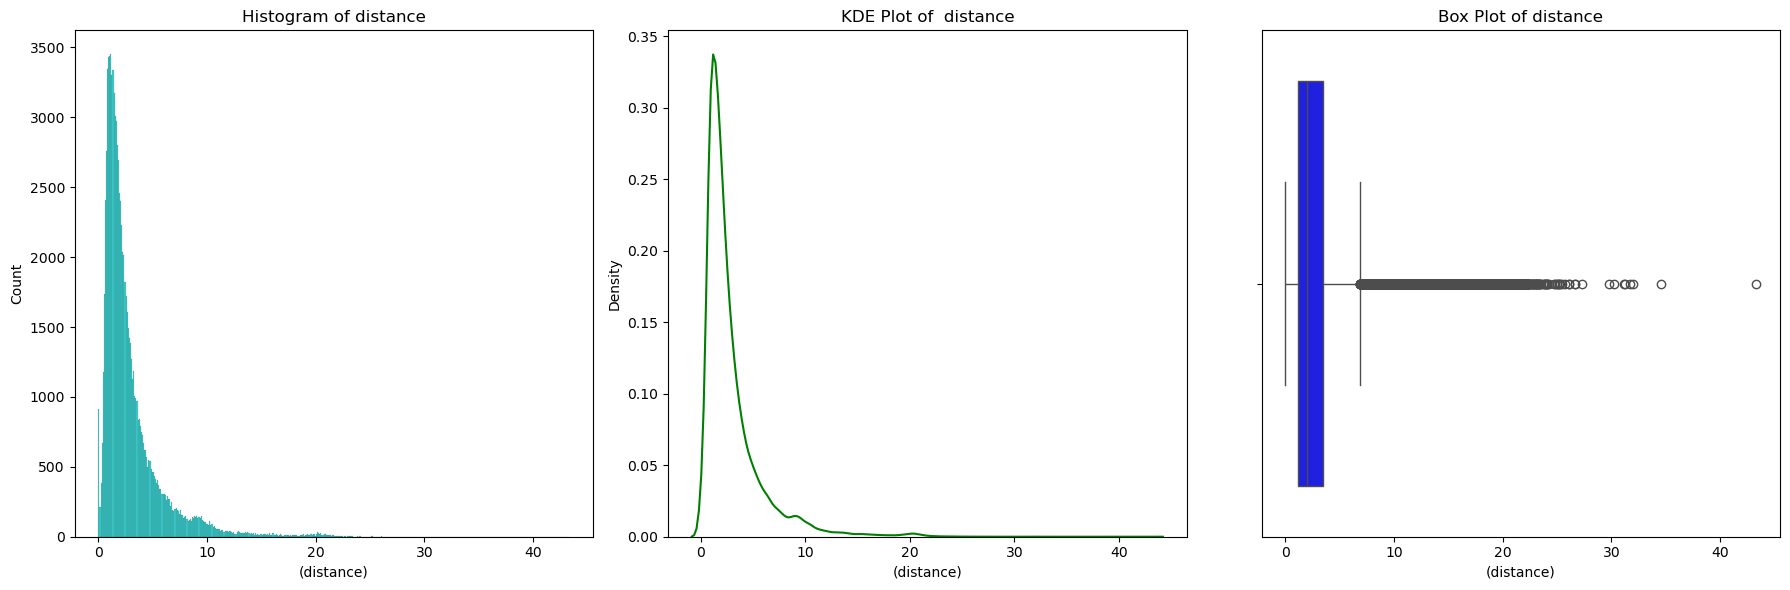

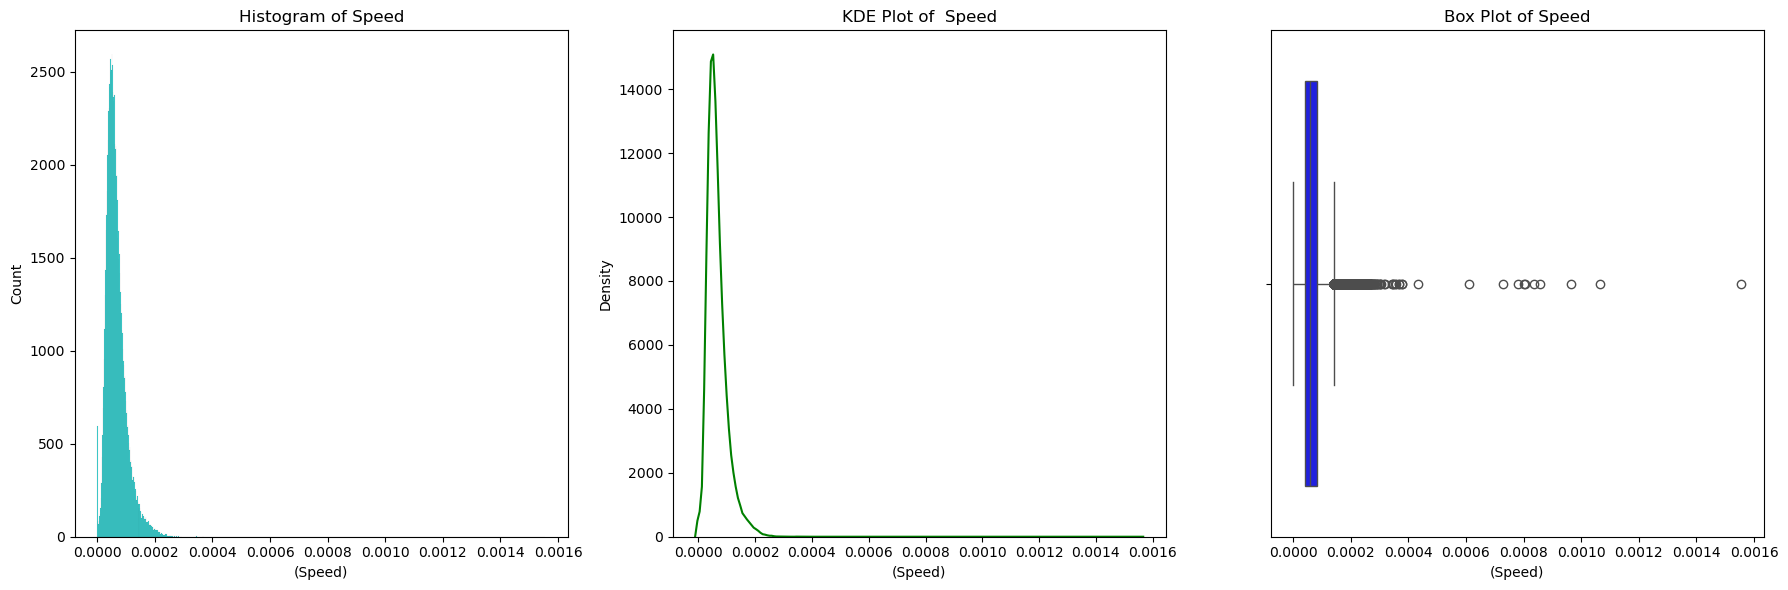

In [18]:

for feature in numerical_features:
    plt.figure(figsize=(18, 6))  
   
  
    plt.subplot(131)
    sns.histplot(data=df, x=feature, color='c')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(f'({feature})')
    plt.ylabel('Count')

    plt.subplot(132)
    sns.kdeplot(data=df, x=feature, color='g')
    plt.title(f'KDE Plot of  {feature}')
    plt.xlabel(f'({feature})')
    plt.ylabel('Density')

    plt.subplot(133)
    sns.boxplot(data=df, x=feature, color='b')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(f'({feature})')
    plt.ylabel('')

    plt.tight_layout()  
    plt.show()


#### Categorical features

In [19]:
categorical_features=['vendor_id','passenger_count','store_and_fwd_flag','hour','day_of_week','month','day_of_month','season','time_of_day']

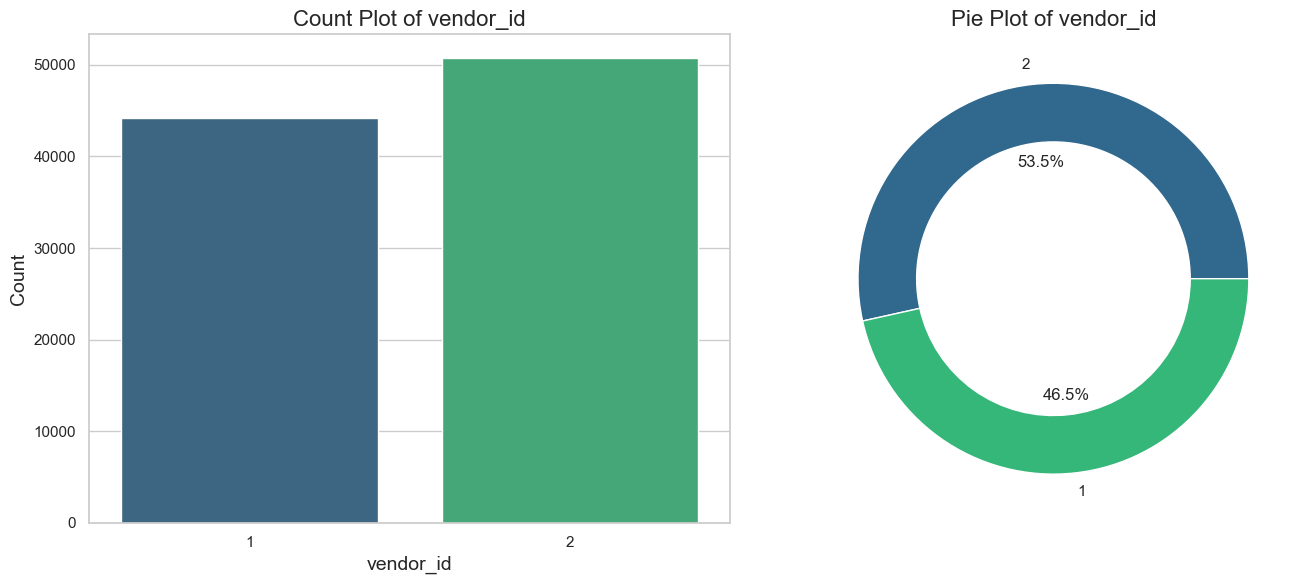

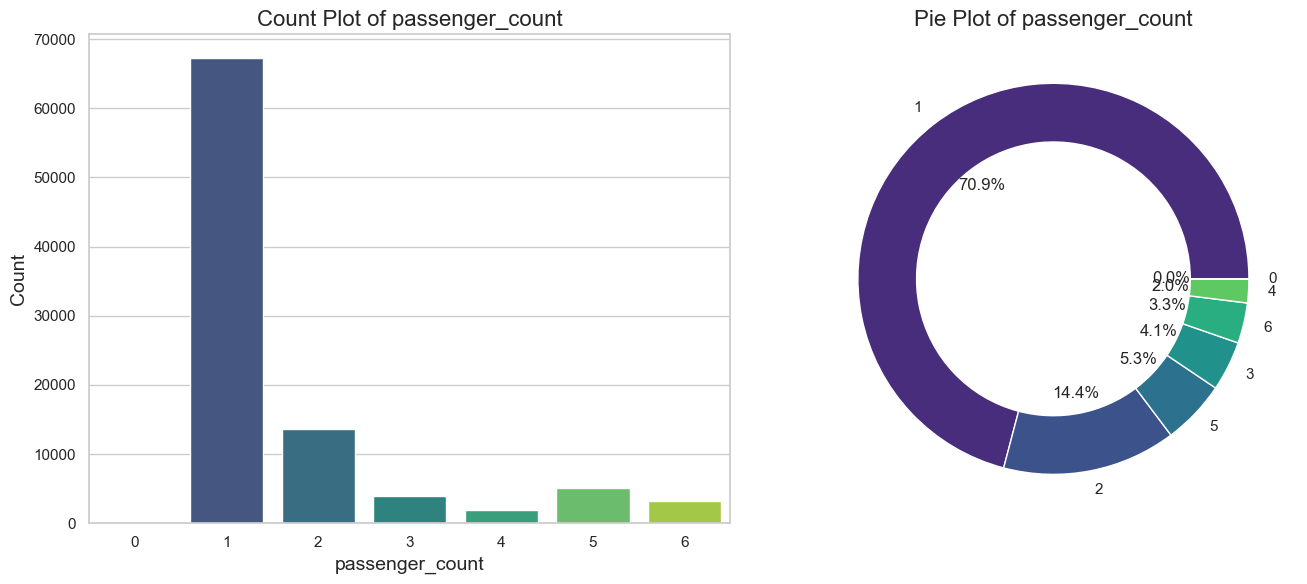

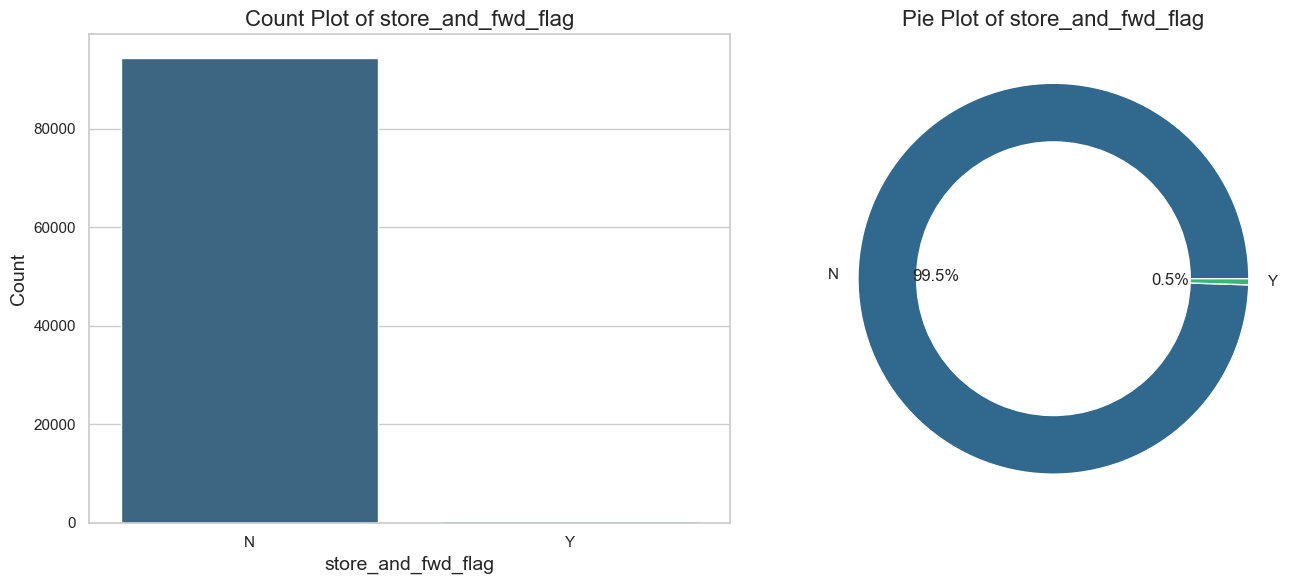

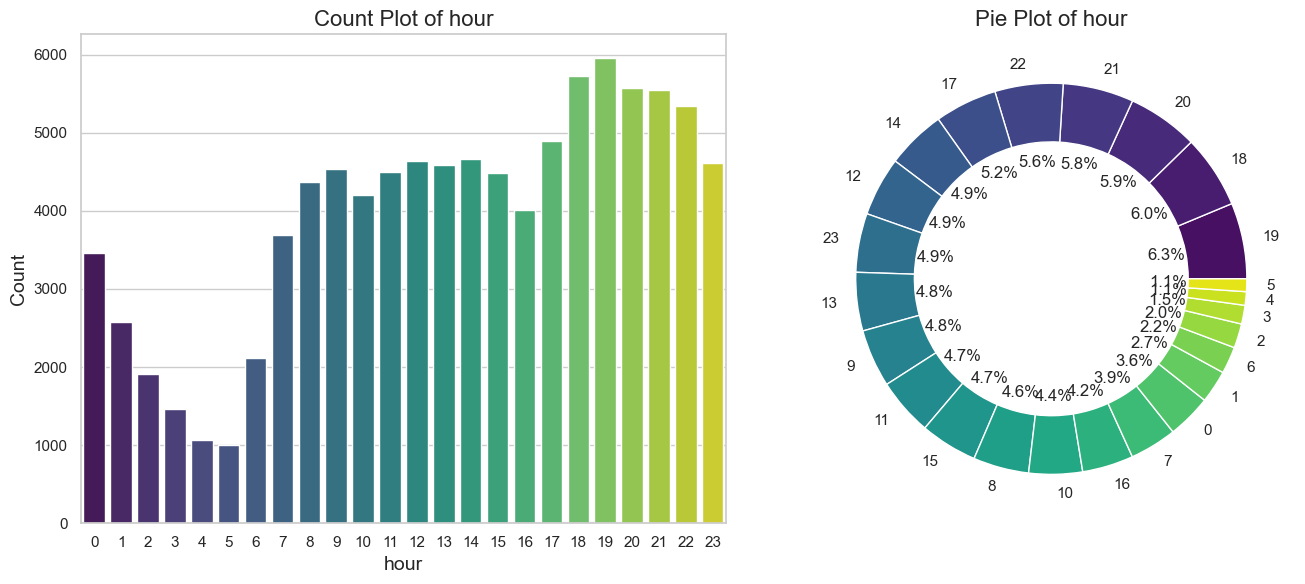

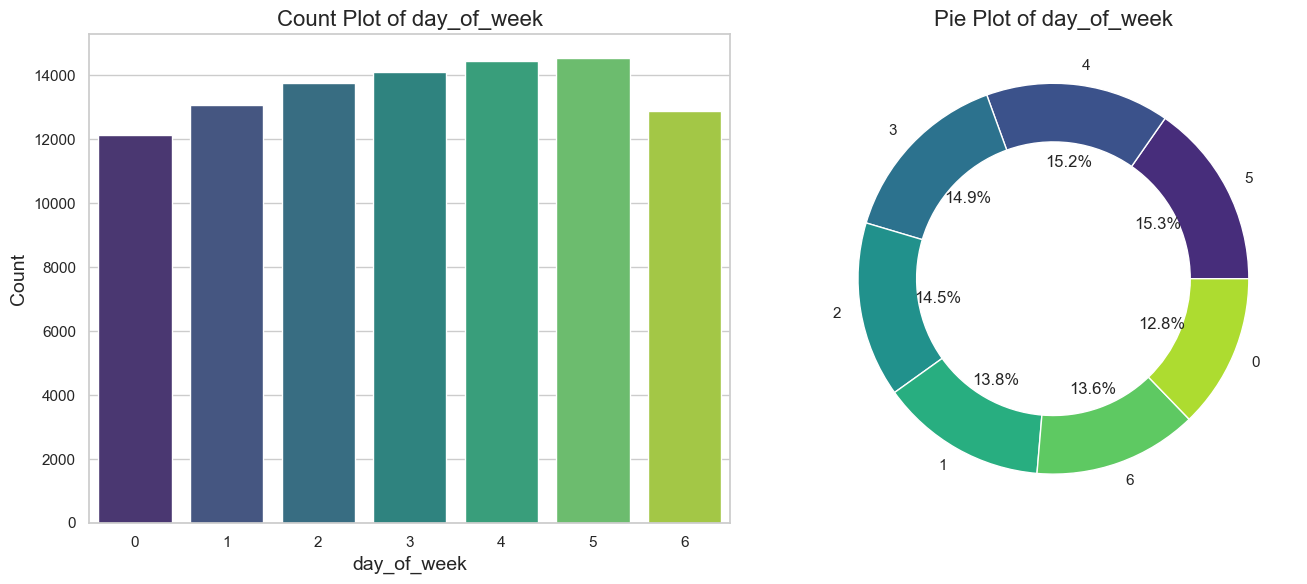

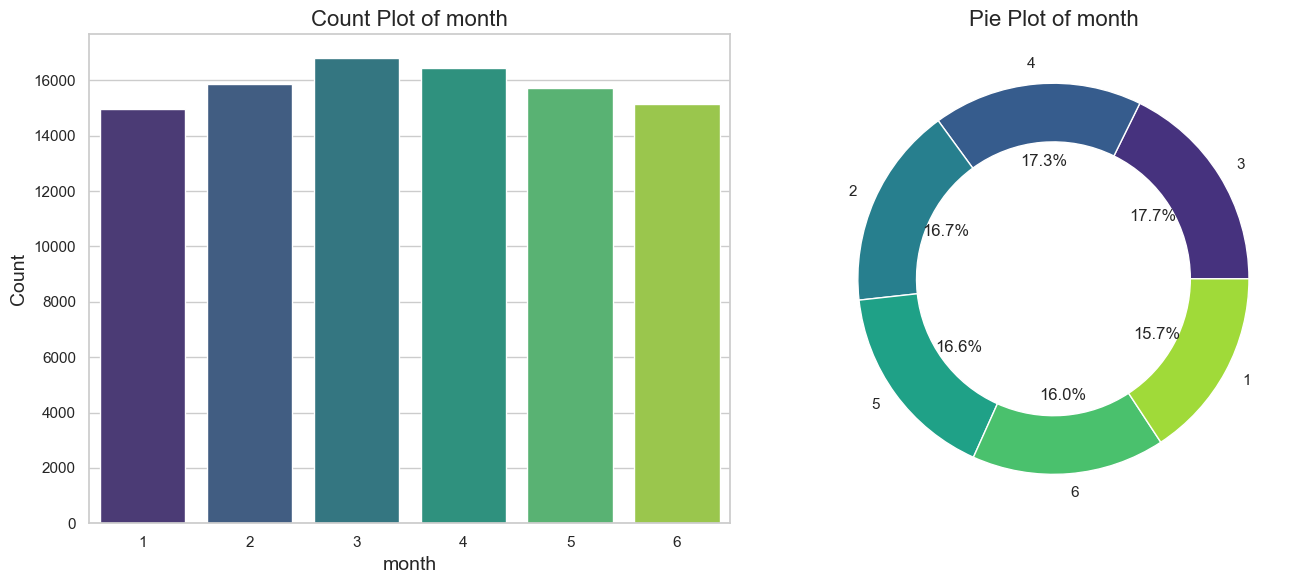

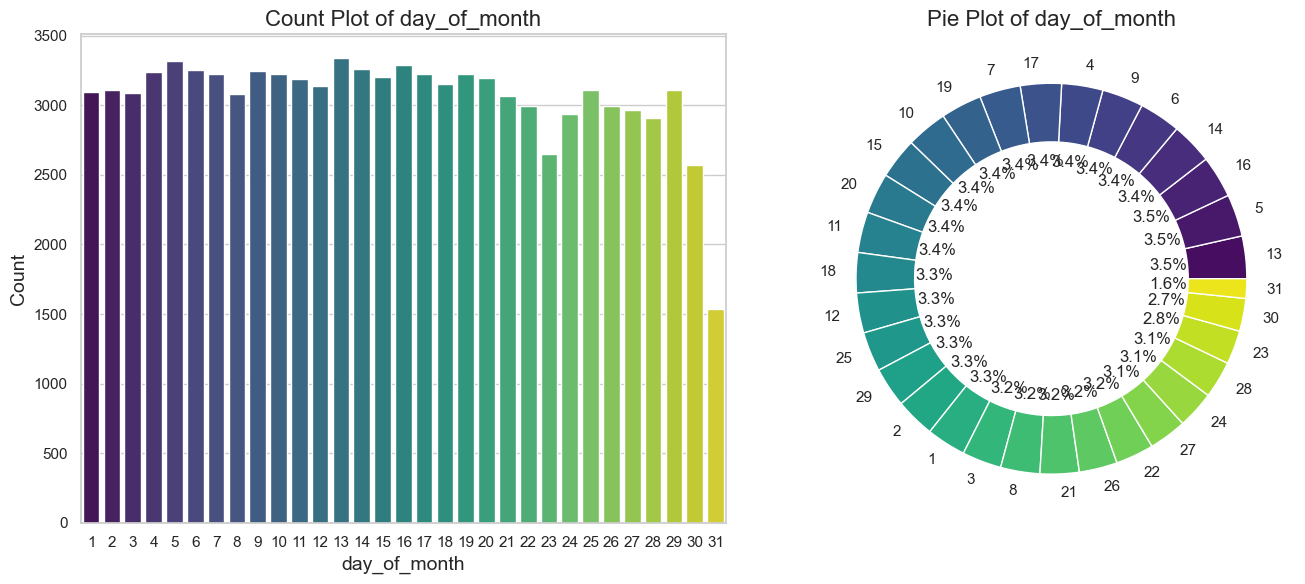

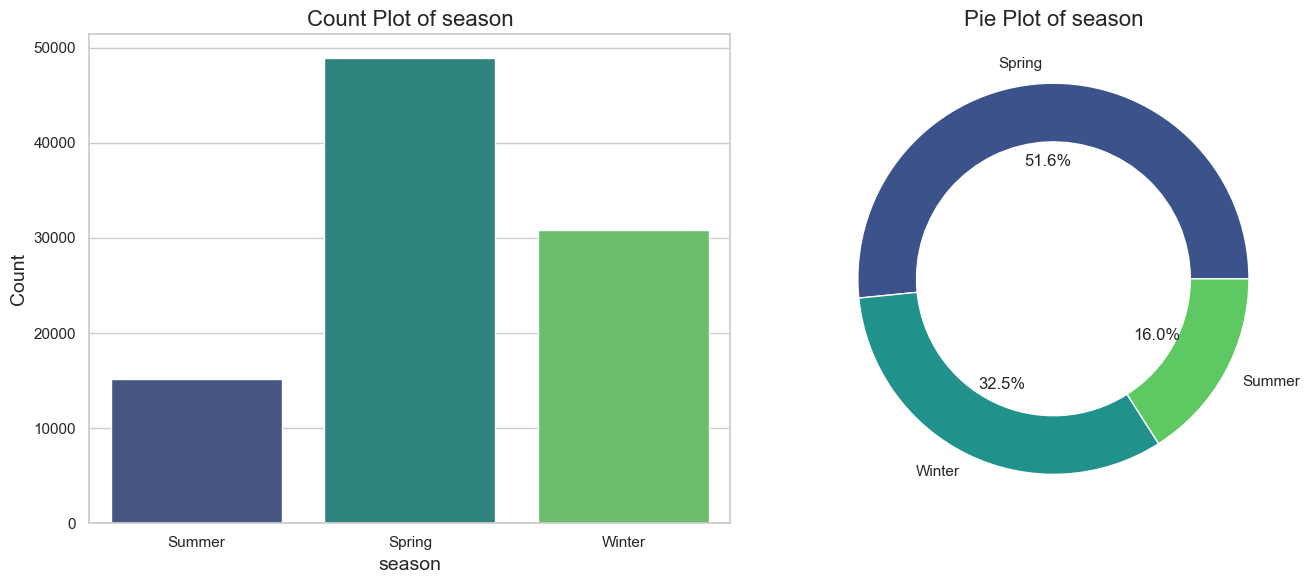

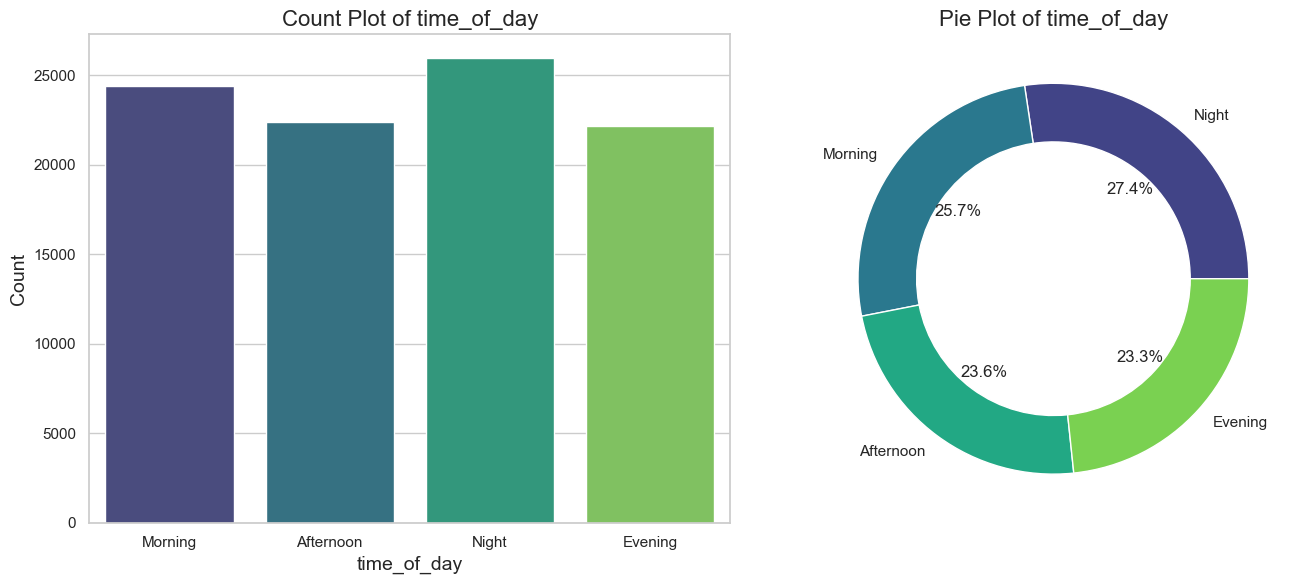

In [20]:
sns.set(style="whitegrid")

for feature in categorical_features:
    plt.figure(figsize=(14, 6))  
    
    plt.subplot(121)
    sns.countplot(data=df, x=feature, palette="viridis") 
    plt.title(f'Count Plot of {feature}', fontsize=16)
    plt.xlabel(str(feature), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    

    plt.subplot(122)
    counts = df[feature].value_counts() 
    counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", len(counts)), wedgeprops=dict(width=0.3, edgecolor='w')) 
    plt.title(f'Pie Plot of {feature}', fontsize=16)
    plt.ylabel('')  
    plt.xlabel('')  

    plt.tight_layout()  
    plt.show()


# Step 4: Feature Relationships <a id="step4"></a>

1. Numerical vs Numerical


`trip_duration` vs `pickup_datetime`

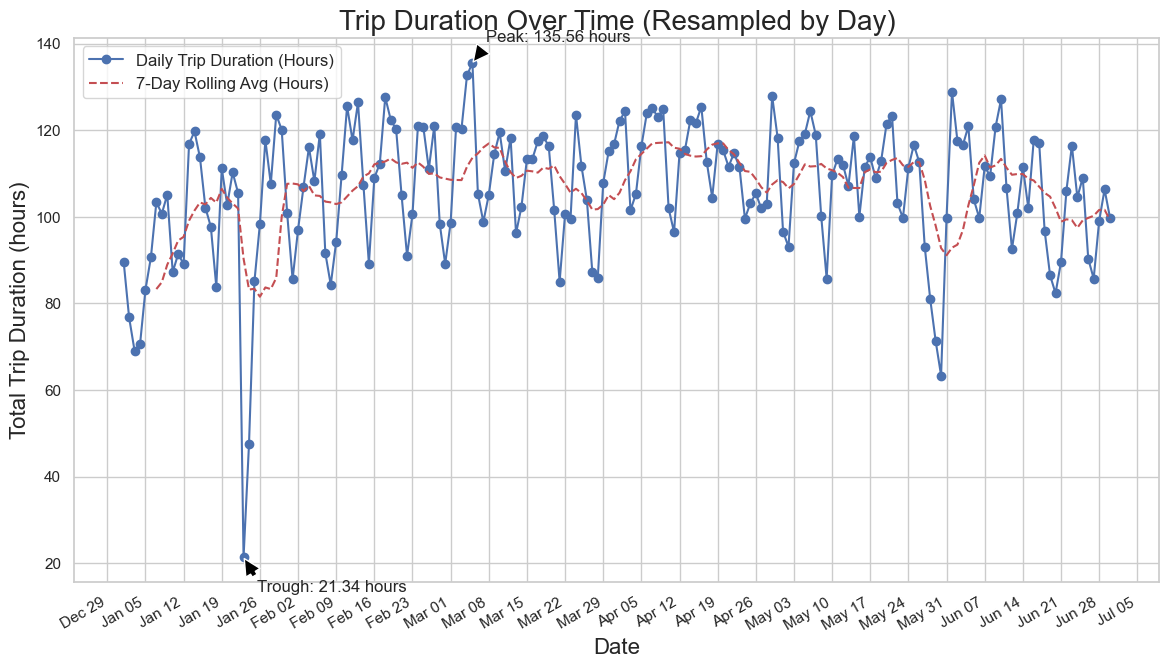

In [21]:
sns.set(style='whitegrid')


grouped = df.groupby('pickup_datetime')['trip_duration'].sum()


resampled = grouped.resample('D').sum().reset_index()

resampled['trip_duration_hours'] = resampled['trip_duration'] / 3600


plt.figure(figsize=(14, 8))
plt.plot(resampled['pickup_datetime'], resampled['trip_duration_hours'], marker='o', linestyle='-', color='b', label='Daily Trip Duration (Hours)')


rolling_avg = resampled['trip_duration_hours'].rolling(window=7).mean()
plt.plot(resampled['pickup_datetime'], rolling_avg, color='r', linestyle='--', label='7-Day Rolling Avg (Hours)')


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator(interval=1))


plt.title('Trip Duration Over Time (Resampled by Day)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Trip Duration (hours)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.gcf().autofmt_xdate()

max_duration = resampled['trip_duration_hours'].max()
min_duration = resampled['trip_duration_hours'].min()
plt.annotate(f'Peak: {max_duration:.2f} hours', 
             xy=(resampled['pickup_datetime'][resampled['trip_duration_hours'].idxmax()], max_duration),
             xytext=(10, 15), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Trough: {min_duration:.2f} hours', 
             xy=(resampled['pickup_datetime'][resampled['trip_duration_hours'].idxmin()], min_duration),
             xytext=(10, -25), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()


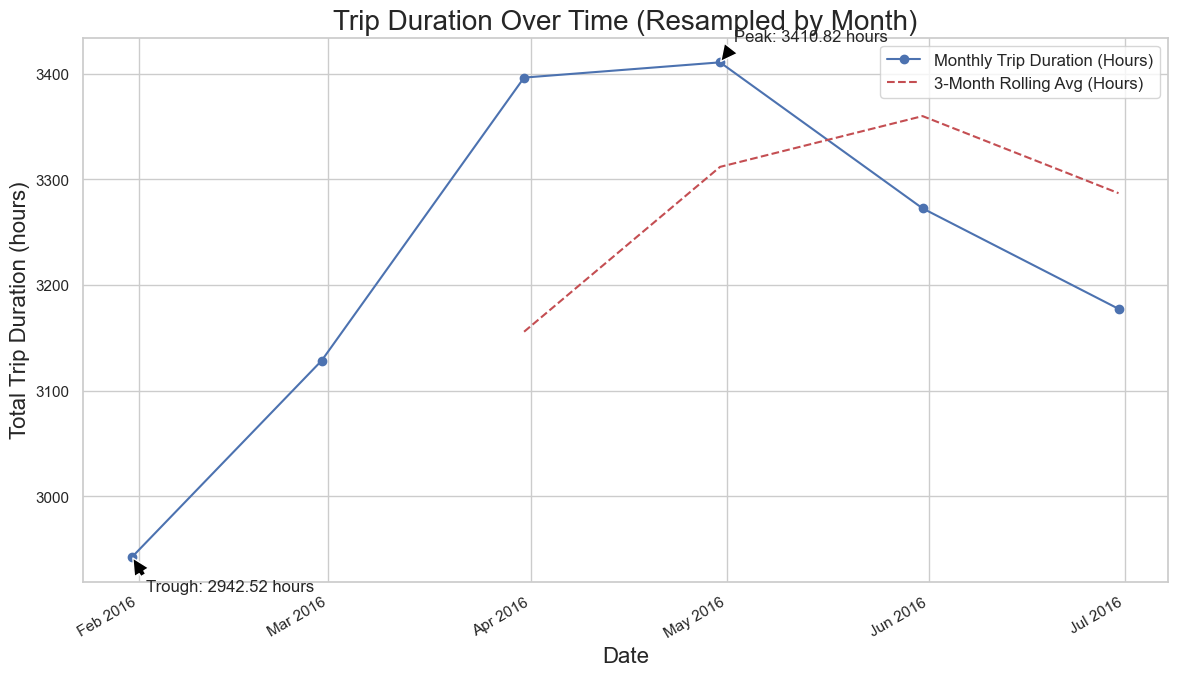

In [22]:
sns.set(style='whitegrid')


grouped = df.groupby('pickup_datetime')['trip_duration'].sum()


resampled = grouped.resample('M').sum().reset_index()


resampled['trip_duration_hours'] = resampled['trip_duration'] / 3600


plt.figure(figsize=(14, 8))
plt.plot(resampled['pickup_datetime'], resampled['trip_duration_hours'], marker='o', linestyle='-', color='b', label='Monthly Trip Duration (Hours)')


rolling_avg = resampled['trip_duration_hours'].rolling(window=3).mean()
plt.plot(resampled['pickup_datetime'], rolling_avg, color='r', linestyle='--', label='3-Month Rolling Avg (Hours)')


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))


plt.title('Trip Duration Over Time (Resampled by Month)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Trip Duration (hours)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.gcf().autofmt_xdate()


max_duration = resampled['trip_duration_hours'].max()
min_duration = resampled['trip_duration_hours'].min()
plt.annotate(f'Peak: {max_duration:.2f} hours', 
             xy=(resampled['pickup_datetime'][resampled['trip_duration_hours'].idxmax()], max_duration),
             xytext=(10, 15), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Trough: {min_duration:.2f} hours', 
             xy=(resampled['pickup_datetime'][resampled['trip_duration_hours'].idxmin()], min_duration),
             xytext=(10, -25), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


`trip duration`VS `distance` 

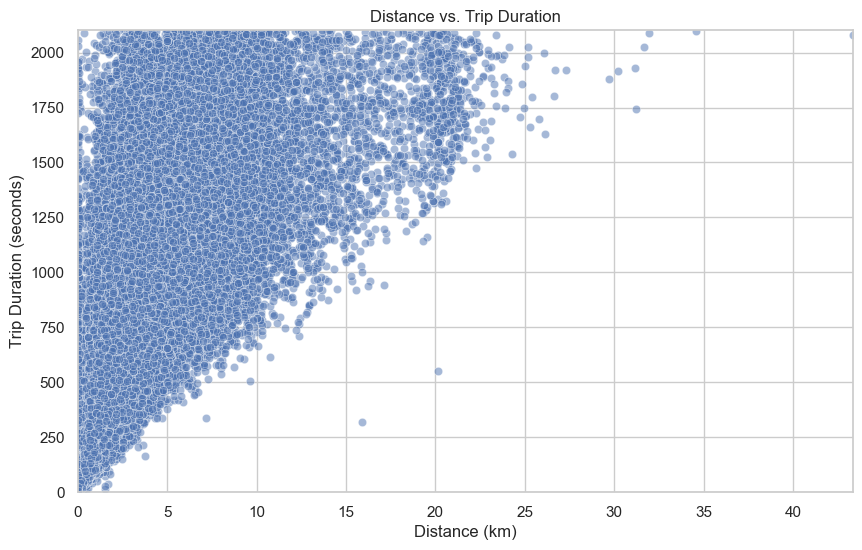

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='trip_duration', alpha=0.5)
plt.title('Distance vs. Trip Duration')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.xlim(0, df['distance'].max())
plt.ylim(0, df['trip_duration'].max())
plt.show()


2. Numerical VS Categorical

`trip_duration` VS `vendor_id`



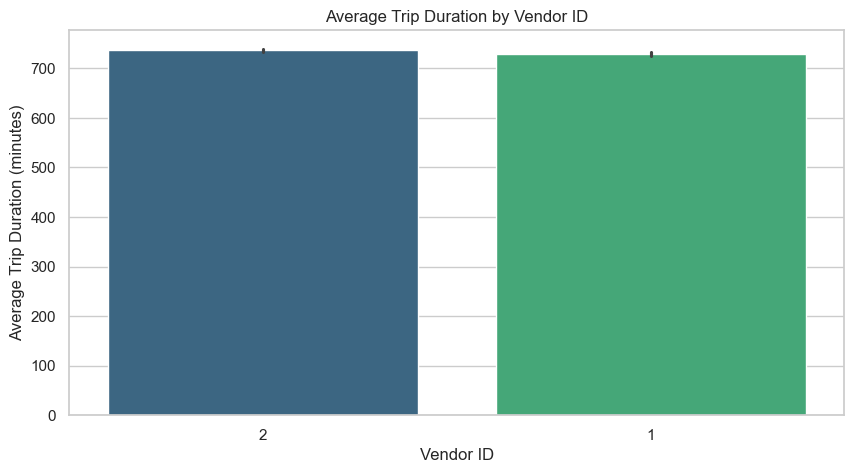

In [24]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))


ax = sns.barplot(data=df, x='vendor_id', y='trip_duration', palette='viridis',order=df.groupby('vendor_id')['trip_duration'].mean().sort_values(ascending=False).index)


plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Vendor ID')
plt.show()


`trip_duration` VS `passenger_count`


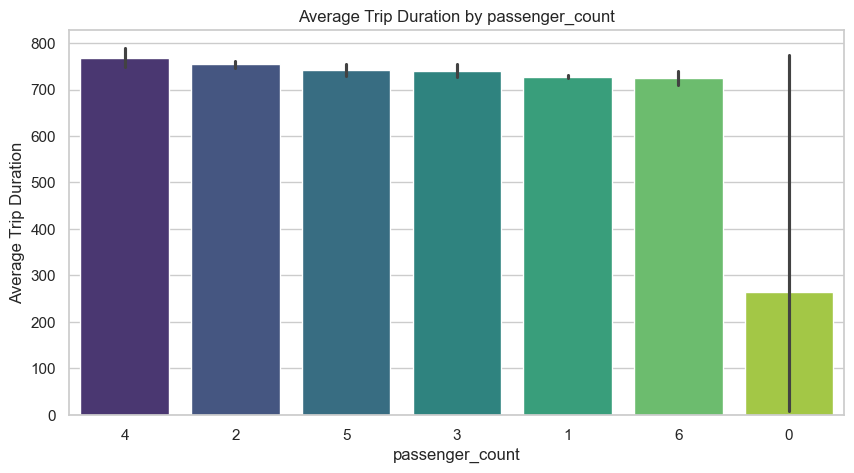

In [25]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))


ax = sns.barplot(data=df, x='passenger_count', y='trip_duration', palette='viridis',order=df.groupby('passenger_count')['trip_duration'].mean().sort_values(ascending=False).index)


plt.xlabel('passenger_count')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by passenger_count')
plt.show()


`trip duration` VS `time of day`

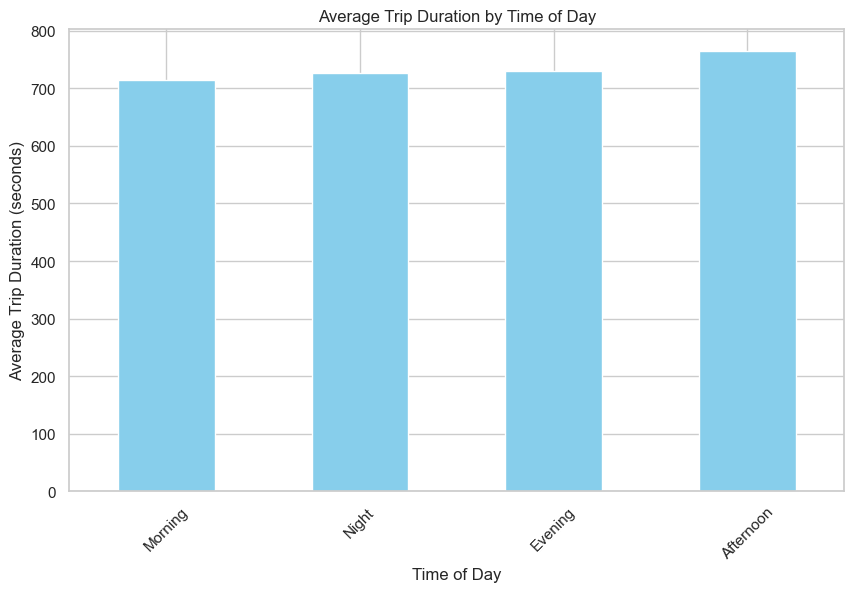

In [26]:
avg_duration_by_time = df.groupby('time_of_day')['trip_duration'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_duration_by_time.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=45)
plt.show()


`trip duration` VS `day of the week`

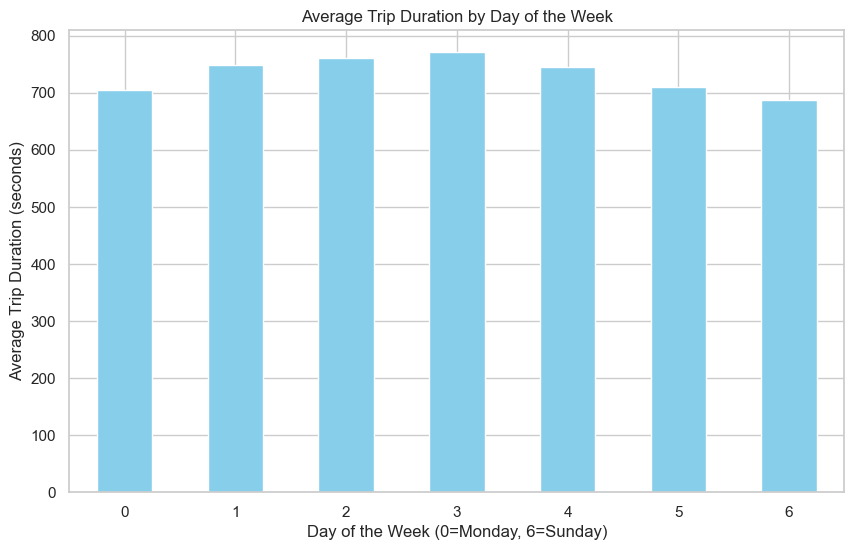

In [27]:
# Calculate average trip duration by day of the week
avg_duration_by_weekday = df.groupby('day_of_week')['trip_duration'].mean()


plt.figure(figsize=(10, 6))
avg_duration_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)
plt.show()


`trip duration` VS `month`

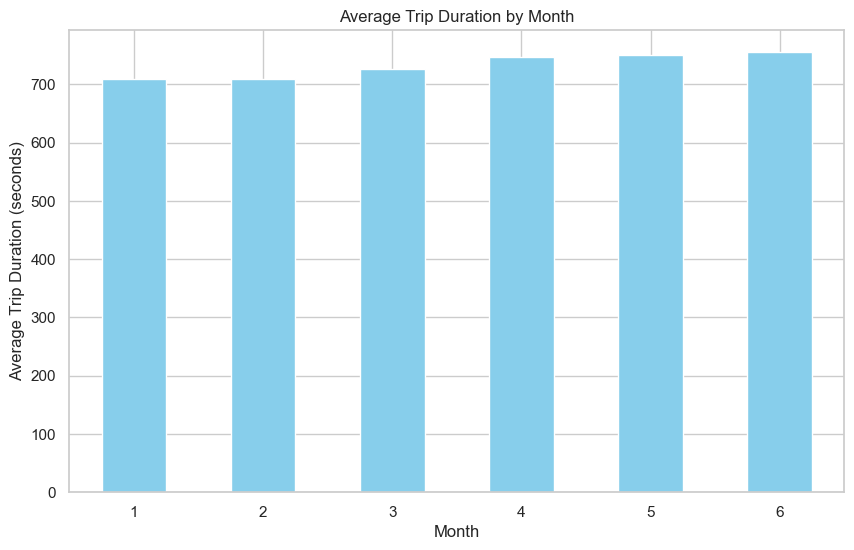

In [28]:

avg_duration_by_month = df.groupby('month')['trip_duration'].mean()


plt.figure(figsize=(10, 6))
avg_duration_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)
plt.show()


`trip duration` VS `day_of_month`

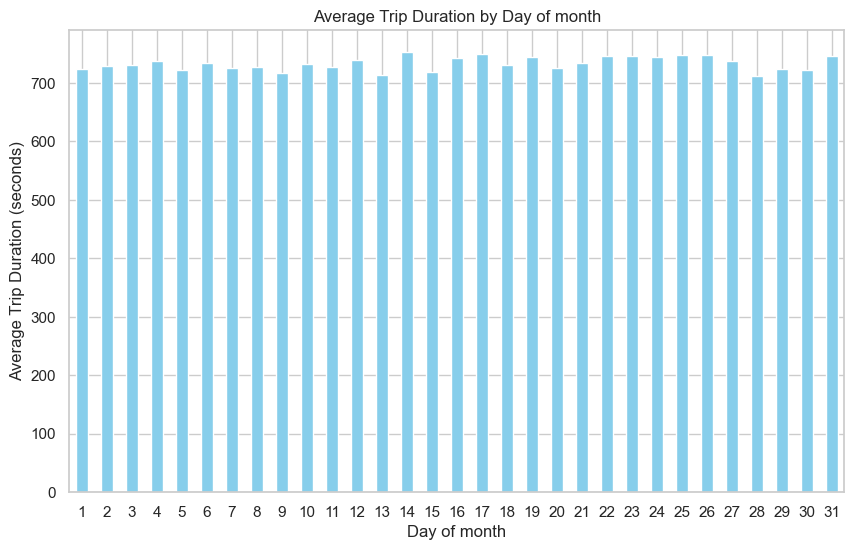

In [29]:

avg_duration_by_day_of_month = df.groupby('day_of_month')['trip_duration'].mean()
plt.figure(figsize=(10, 6))
avg_duration_by_day_of_month.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Day of month')
plt.xlabel('Day of month')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)
plt.show()


`trip duration` VS `season`

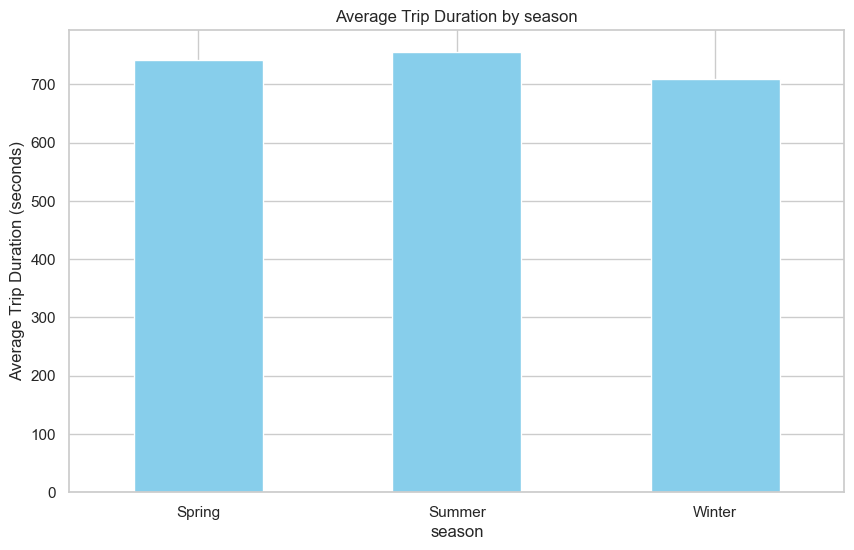

In [30]:

avg_duration_by_day_of_season = df.groupby('season')['trip_duration'].mean()
plt.figure(figsize=(10, 6))
avg_duration_by_day_of_season.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by season')
plt.xlabel('season')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)
plt.show()


In [31]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'hour',
       'day_of_week', 'month', 'day_of_year', 'day_of_month', 'distance',
       'Speed', 'time_of_day', 'season'],
      dtype='object')

`Speed` VS `vendor_id`


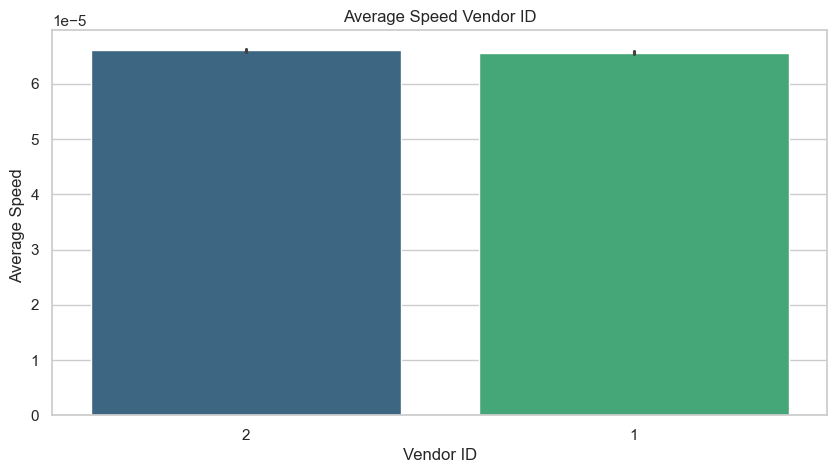

In [32]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))


ax = sns.barplot(data=df, x='vendor_id', y='Speed', palette='viridis',order=df.groupby('vendor_id')['Speed'].mean().sort_values(ascending=False).index)


plt.xlabel('Vendor ID')
plt.ylabel('Average Speed ')
plt.title('Average Speed Vendor ID')
plt.show()


`Speed` VS `passenger_count`

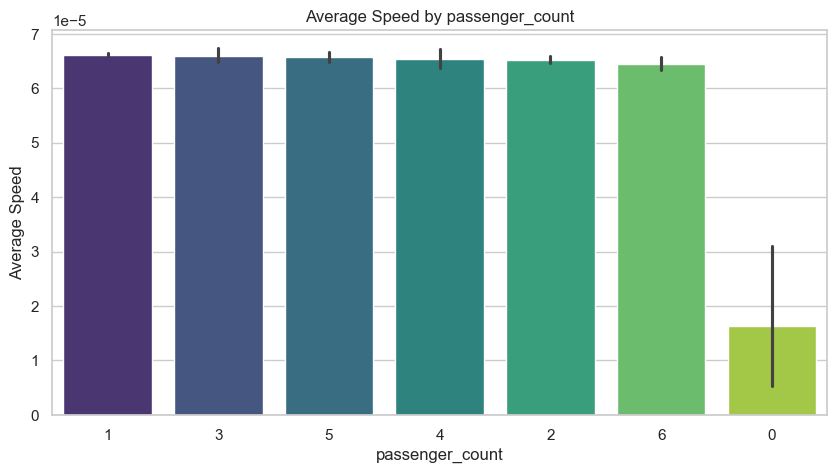

In [33]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))


ax = sns.barplot(data=df, x='passenger_count', y='Speed', palette='viridis',order=df.groupby('passenger_count')['Speed'].mean().sort_values(ascending=False).index)


plt.xlabel('passenger_count')
plt.ylabel('Average Speed')
plt.title('Average Speed by passenger_count')
plt.show()


#### Number of Trips over time

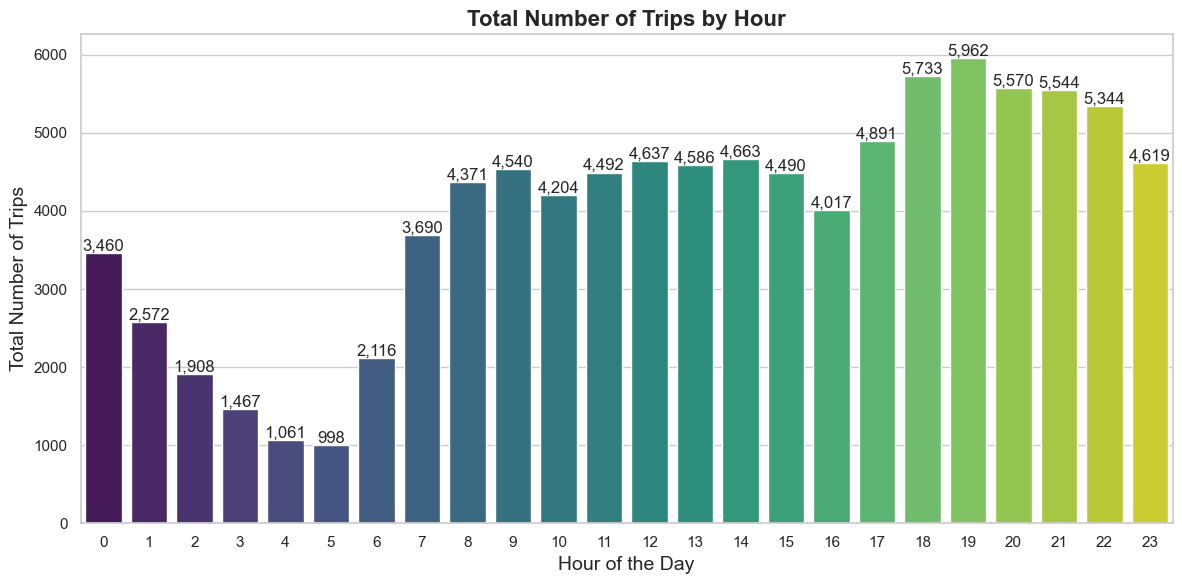

In [34]:
# Total trips by hour
hourly_trip_count = df.groupby(df['pickup_datetime'].dt.hour)['vendor_id'].count().reset_index()
hourly_trip_count.columns = ['hour', 'Total Trips']

plt.figure(figsize=(12, 6))
hourly_plot = sns.barplot(data=hourly_trip_count, x='hour', y='Total Trips', palette='viridis')

plt.title('Total Number of Trips by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Number of Trips', fontsize=14)

for p in hourly_plot.patches:
    height = p.get_height()
    hourly_plot.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


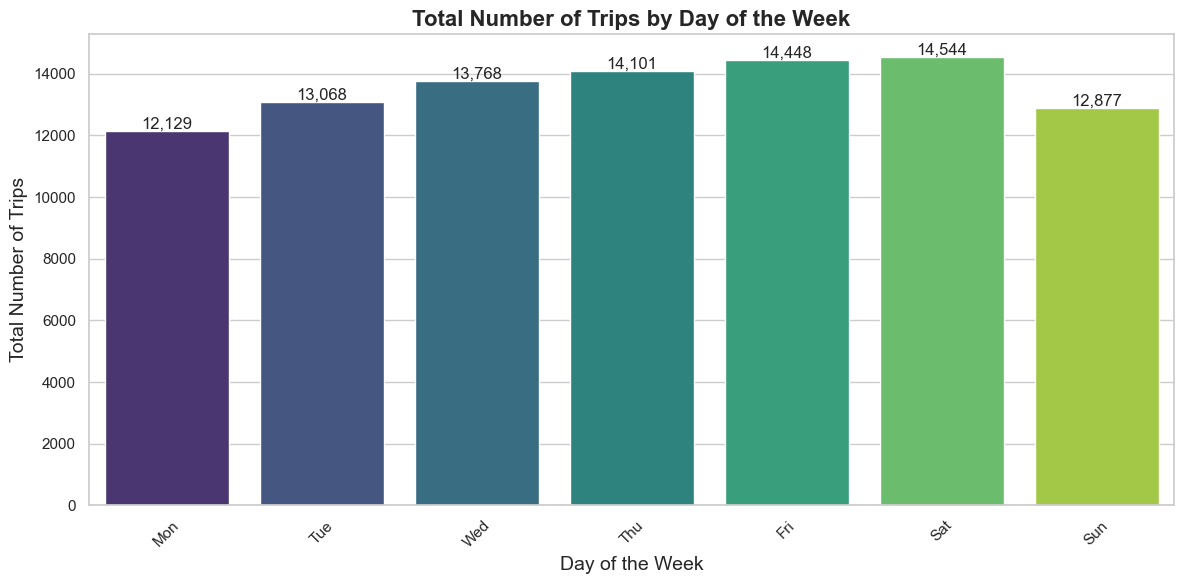

In [35]:
# Total trips by day of the week
daily_trip_count = df.groupby(df['pickup_datetime'].dt.dayofweek)['vendor_id'].count().reset_index()
daily_trip_count.columns = ['day_of_week', 'Total Trips']

plt.figure(figsize=(12, 6))
daily_plot = sns.barplot(data=daily_trip_count, x='day_of_week', y='Total Trips', palette='viridis')

plt.title('Total Number of Trips by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Number of Trips', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)

for p in daily_plot.patches:
    height = p.get_height()
    daily_plot.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


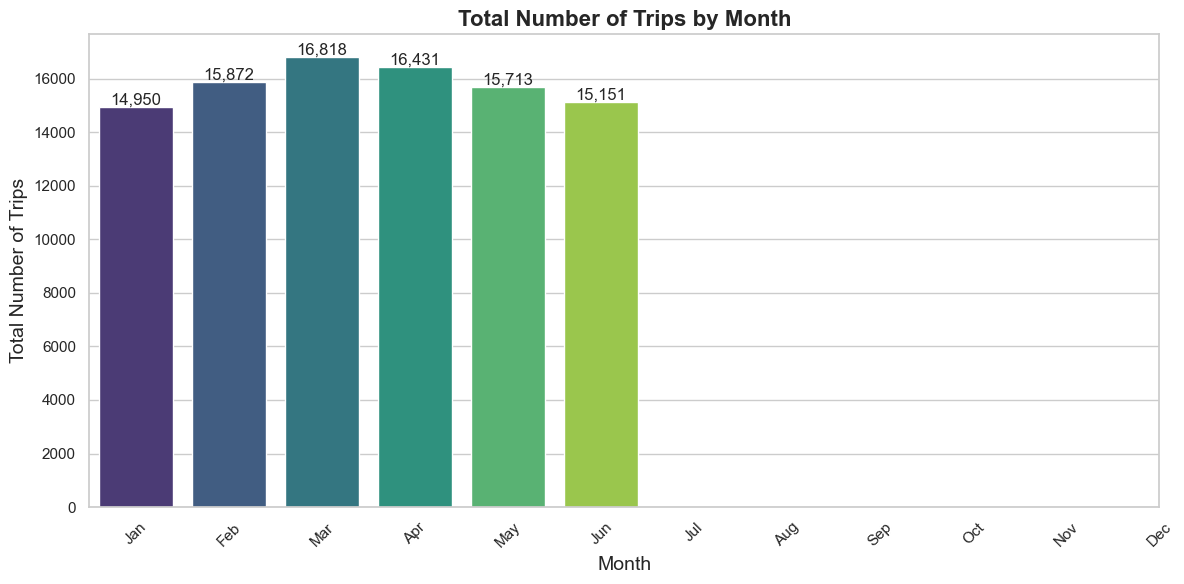

In [36]:
# Total trips by month
monthly_trip_count = df.groupby(df['pickup_datetime'].dt.month)['vendor_id'].count().reset_index()
monthly_trip_count.columns = ['month', 'Total Trips']

plt.figure(figsize=(12, 6))
monthly_plot = sns.barplot(data=monthly_trip_count, x='month', y='Total Trips', palette='viridis')

plt.title('Total Number of Trips by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Number of Trips', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

for p in monthly_plot.patches:
    height = p.get_height()
    monthly_plot.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


# Step 5: Conclusion and Insights  <a id="step5"></a>
1. **What is the distribution of trip durations?**
   - **Insight**: The distribution of trip durations is highly skewed, with most trips being short. However, a long tail indicates the presence of a few extremely long trips, which may suggest outliers caused by unusual conditions such as heavy traffic or delays.

2. **How does trip duration vary by time of day?**
   - **Insight**: Trip durations tend to be shorter during peak traffic hours (early mornings and late afternoons) due to congestion, while trips during off-peak hours (late nights and early mornings) are generally longer, likely because of lighter traffic.

3. **How does the day of the week impact trip durations?**
   - **Insight**: Weekdays generally show shorter and more consistent trip durations compared to weekends. This can be attributed to routine, work-related trips on weekdays, while weekends see longer trips, possibly for leisure activities.

4. **Is there a relationship between trip duration and the distance traveled?**
   - **Insight**: A strong positive correlation exists between trip duration and the distance traveled. However, some shorter trips have unexpectedly long durations, which could be a result of traffic delays or inefficient routes.

5. **How do pickup and dropoff locations impact trip duration?**
   - **Insight**: Trips starting or ending in central, high-traffic areas are usually shorter in terms of distance but may experience delays due to congestion. On the other hand, trips involving less trafficked, outskirt areas often have longer durations due to greater distances.

6. **Are there any notable patterns related to specific routes?**
   - **Insight**: Consistent patterns are observed on frequently traveled routes, particularly between commercial hubs or popular destinations. Lesser-used routes show more variability in trip durations, indicating the influence of unpredictable traffic conditions or road inefficiencies.

7. **What is the relationship between the number of passengers and trip duration?**
   - **Insight**: There appears to be no significant relationship between the number of passengers and the duration of the trip. Whether there is one passenger or multiple passengers, trip durations remain relatively consistent.

8. **How does trip duration vary by hour of the day?**
   - **Insight**: Early morning trips (midnight to 5 AM) tend to be faster due to less traffic. In contrast, peak hours, such as 8-10 AM and 5-7 PM, show significantly longer trip durations, influenced by higher congestion during commuting times.

9. **What outliers exist in the data, and what do they represent?**
   - **Insight**: The dataset contains several outliers, both extremely short and extremely long trips. These outliers likely represent special cases such as traffic anomalies, route inefficiencies, or data collection issues, which warrant further investigation to refine predictions.